### Import the relevant libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd


%matplotlib inline


sns.set()

### Load the raw data

In [2]:
from sklearn.datasets import load_boston

data_raw = load_boston()

In [3]:
print(data_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(data_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
data['price'] = data_raw.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### Preprocessing

#### Explore describtive statistic of variables

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Handle missing values

No missing values in dataset

#### EDA

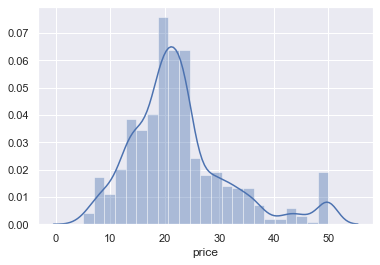

In [9]:
sns.distplot(data['price'])

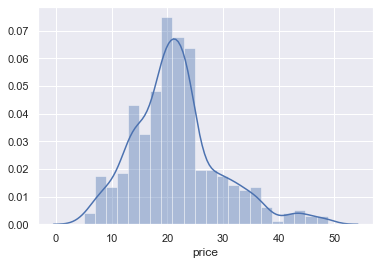

In [10]:
q = data['price'].quantile(0.99)
data = data[data['price'] < q]
sns.distplot(data['price'])

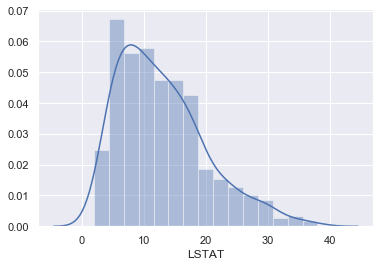

In [11]:
sns.distplot(data['LSTAT'])

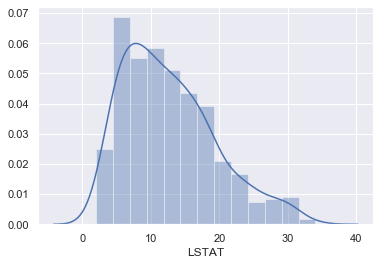

In [12]:
q = data['LSTAT'].quantile(0.99)
data = data[data['LSTAT'] < q]
sns.distplot(data['LSTAT'])

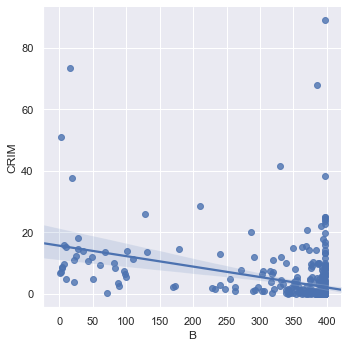

In [13]:
sns.lmplot(x='B',y='CRIM', data=data)

### Linear regression model

#### Declare the inputs and target

In [120]:
y = data['price']
x = data.drop(['price'],axis=1) 

In [121]:
#x = data.iloc[:, 0:13].values
#y = data.iloc[:, -1].values

#### Scale the data

Standardize the features 

#### Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [123]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((388, 13), (97, 13), (388,), (97,))

In [126]:
### Add the polynimial term to the equation/model

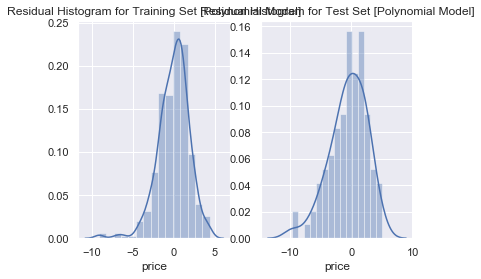

In [127]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
x_train_poly = poly_features.fit_transform(x_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(x_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(x_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))



y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test

plt.subplot(1, 2, 1)
sns.distplot(y_train_residual, bins=15)
plt.title('Residual Histogram for Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.distplot(y_test_residual, bins=15)
plt.title('Residual Histogram for Test Set [Polynomial Model]')

plt.show()

In [128]:
from sklearn import metrics

# evaluating the model on training data-set
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
r2_train = metrics.explained_variance_score(y_train, y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
print("\n")

print("-----------------------------------------------------------")

# evaluating the model on test data-set
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))
r2_test = metrics.explained_variance_score(y_test, y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


The polynomial model performance for the training set
RMSE of training set is 1.8972924181631414
R2 score of training set is 0.9387506791205826


-----------------------------------------------------------
The polynomial model performance for the test set
RMSE of test set is 3.0671105272510903
R2 score of test set is 0.8688559041342363


In [130]:
poly_performance = pd.DataFrame(y_test_predicted, columns=['Prediction'])
poly_performance.head()

,Prediction
0,27.538507
1,20.849542
2,37.731416
3,16.550493
4,21.990583


In [131]:
poly_performance['Targets'] = y_test
poly_performance.head()

,Prediction,Targets
0,27.538507,NaN
1,20.849542,NaN
2,37.731416,34.7
3,16.550493,NaN
4,21.990583,NaN


In [132]:
y_test = y_test.reset_index(drop=True)
y_test

0     24.3
1     18.5
2     43.1
3     14.5
4     22.2
      ... 
92    26.4
93    22.8
94    23.0
95    31.6
96    27.9
Name: price, Length: 97, dtype: float64

In [133]:
poly_performance['Targets'] = y_test
poly_performance

,Prediction,Targets
0,27.538507,24.3
1,20.849542,18.5
2,37.731416,43.1
3,16.550493,14.5
4,21.990583,22.2
...,...,...
92,20.056755,26.4
93,20.860936,22.8
94,24.237357,23.0
95,28.120857,31.6


In [135]:
poly_performance['Residual'] = poly_performance['Targets'] - poly_performance['Prediction']

poly_performance['Difference%'] = np.absolute(poly_performance['Residual']/poly_performance['Targets'] *100)

poly_performance

,Prediction,Targets,Residual,Difference%
0,27.538507,24.3,-3.238507,13.327190
1,20.849542,18.5,-2.349542,12.700227
2,37.731416,43.1,5.368584,12.456111
3,16.550493,14.5,-2.050493,14.141328
4,21.990583,22.2,0.209417,0.943318
...,...,...,...,...
92,20.056755,26.4,6.343245,24.027444
93,20.860936,22.8,1.939064,8.504667
94,24.237357,23.0,-1.237357,5.379812
95,28.120857,31.6,3.479143,11.009947


In [136]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
poly_performance.sort_values(by=['Difference%'])

,Prediction,Targets,Residual,Difference%
41,21.22,21.20,-0.02,0.11
80,43.32,43.50,0.18,0.41
4,21.99,22.20,0.21,0.94
13,25.25,25.00,-0.25,1.00
57,22.85,23.10,0.25,1.07
70,45.46,46.00,0.54,1.18
31,18.22,18.00,-0.22,1.22
81,13.28,13.10,-0.18,1.40
48,19.78,20.10,0.32,1.58
54,29.07,28.60,-0.47,1.64


#### Training the Model

#### create the regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

### Checking the Model

Plot predicted values of the model against the targets

In [ ]:
predictions = reg.predict(x_train)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(y_train,predictions)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

The residual plot to check the model

In [ ]:
sns.distplot(y_train - predictions)

The model turns to overestimate the target since there is a longer tail on the positive side(right). a much higher 

price is predicted than is observed. On the left it is observeed that the model rarely underestimate the target 

#### Calcuting the R squred

In [ ]:
reg.score(x_train,y_train)

In [ ]:
from sklearn import metrics

metrics.explained_variance_score(y_train,predictions)

#### Finding the weights and bias

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

In [ ]:
reg_summary = pd.DataFrame(data.drop(['price'],axis=1).columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

A postive weight shows that as a feature increases in value, so do the price. e.g. RM

A negative weight shows that as a feature increases in value, price decreases e.g. CRIM

### Testing

In [ ]:
predictions_test = reg.predict(x_test)

In [ ]:
plt.figure(figsize=(15,6))
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_test)',size=18)
plt.scatter(y_test,predictions_test, alpha=0.5)
plt.xlim(0,55)
plt.ylim(0,55)
plt.show()

#### Evaluating the Model

Checking the performance of the model

In [ ]:
performance = pd.DataFrame(predictions_test, columns=['Prediction'])
performance.head()

In [ ]:
performance['Targets'] = y_test
performance.head()

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test

In [ ]:
performance['Targets'] = y_test
performance

In [ ]:
performance['Residual'] = performance['Targets'] - performance['Prediction']

In [ ]:
performance['Difference%'] = np.absolute(performance['Residual']/performance['Targets'] *100)

In [ ]:
performance

In [ ]:
performance.describe()

In [ ]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
performance.sort_values(by=['Difference%'])

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test,predictions_test))
print('MSE', metrics.mean_squared_error(y_test,predictions_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions_test)))

In [ ]:
metrics.explained_variance_score(y_test,predictions_test)

In [ ]:
sns.distplot(y_test-predictions_test)

#### Create the coeffients table to answer the questions

In [ ]:
Question = pd.DataFrame(reg.coef_,data.drop(['price'],axis=1).columns.values)
Question